# Explore here

In [18]:
# Your code here

**House grouping system**

- **Instructions**

We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

- Step 1: Loading the dataset
The dataset can be found in this project folder under the name housing.csv. You can load it into the code directly from the link:

> **DATA FROM**: https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv

We are only interested in the Latitude, Longitude and MedInc columns.

Be sure to conveniently split the dataset into train and test as we have seen in previous lessons. Although these sets are not used to obtain statistics, you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

- Step 2: Build a K-Means

Classify the data into 6 clusters using the K-Means model. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

- Step 3: Predict with the test set

Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not.

- Step 4: Train a supervised classification model

Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.

- Step 5: Save the models
Store both models in the corresponding folder.

In [19]:
import os
import pandas as pd
import csv

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv", sep = ",")

os.makedirs("../data/raw", exist_ok = True)
file_path = os.path.join("../data/raw", "housing.csv")

df.to_csv(file_path, index=False)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We are only interested in the **Latitude**, **Longitude** and **MedInc** columns.

In [20]:
df = df[["Latitude", "Longitude", "MedInc"]]

df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


No missing or null values

In [22]:
df.describe()

,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671
std,2.135952,2.003532,1.899822
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,15.000100


We'll use IQR on MedInc since the max value could indicate an outlier

In [23]:
medInc_stats = df["MedInc"].describe()
medInc_stats

medInc_iqr = medInc_stats["75%"] - medInc_stats["25%"]

medInc_upper_limit = medInc_stats["75%"] + 1.5 * medInc_iqr
medInc_lower_limit = medInc_stats["25%"] - 1.5 * medInc_iqr

print(f'MedInc upper limit: {round(medInc_upper_limit, 2)}')
print(f'MedInc lower limit: {round(medInc_lower_limit, 2)} \n')

MedInc upper limit: 8.01
MedInc lower limit: -0.71 



the max value of 15 is definitely an outlier, on the lower side we could consider 0.49 a potential low outlier, but we'll leave it there

In [24]:
df['MedInc'] = df['MedInc'].apply(
    lambda x: min(x, medInc_upper_limit) if x > medInc_upper_limit else x
)

df.describe()

,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.801010
std,2.135952,2.003532,1.657658
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,8.013025


- **DIVIDING INTO TEST AND TRAIN DF**

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

- **MINMAX SCALING**

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[0.01702128, 0.72908367, 0.36731719],
       [0.12978723, 0.61653386, 0.44090841],
       [0.22446809, 0.38545817, 0.48666833],
       [0.01489362, 0.72111554, 0.19201065],
       [0.45      , 0.45318725, 0.40652857]])

- **K-MEANS**

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6, random_state = 42)
X_train["cluster"] = kmeans.fit_predict(X_train_scaled)
X_test["cluster"] = kmeans.predict(X_test_scaled)

print(X_train.head())
print(X_test.head())

       Latitude  Longitude  MedInc  cluster
14196     32.71    -117.03  3.2596        2
8267      33.77    -118.16  3.8125        1
17445     34.66    -120.48  4.1563        1
14265     32.69    -117.11  1.9425        2
2271      36.78    -119.80  3.5542        0
       Latitude  Longitude  MedInc  cluster
20046     36.06    -119.01  1.6812        2
3024      35.14    -119.46  2.5313        2
15663     37.80    -122.44  3.4801        0
20484     34.28    -118.72  5.7376        3
9814      36.62    -121.93  3.7250        0


- **SHOWING THE DOT PLOTS FOR TRAINING AND TESTING**

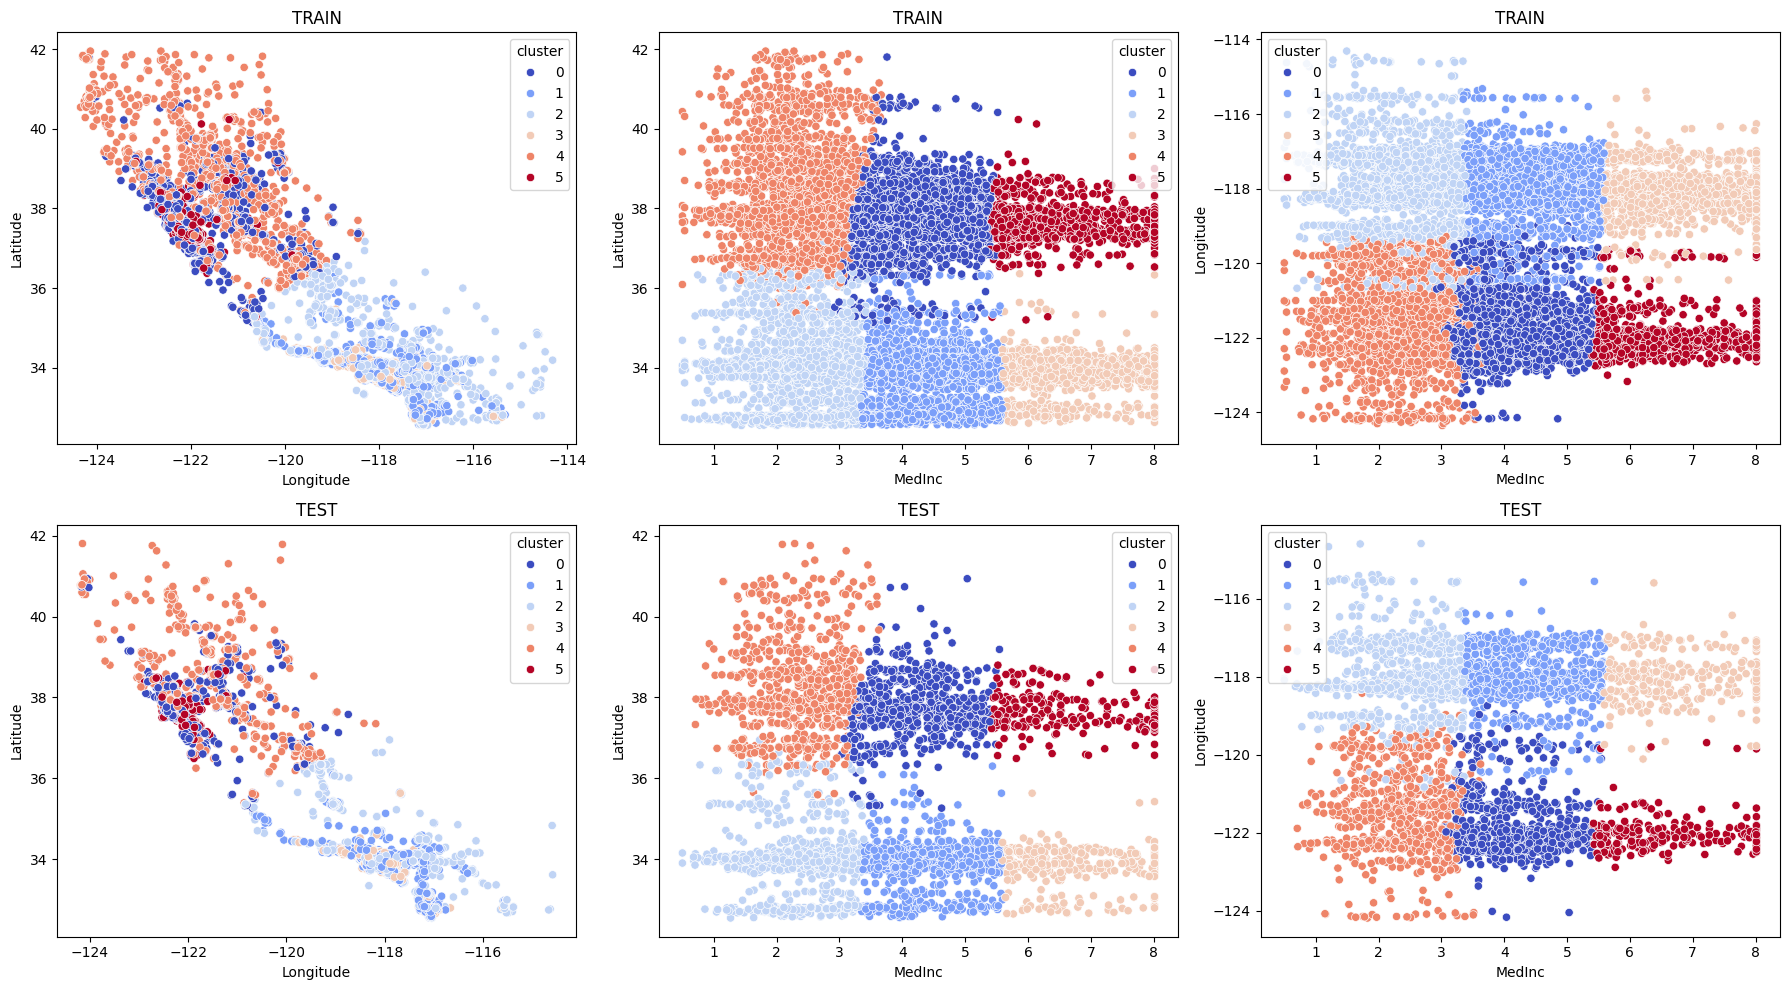

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (18, 10))

#
#   TRAIN
#
sns.scatterplot(ax = axis[0,0], data = X_train, x = "Longitude", y = "Latitude", hue = "cluster", palette = "coolwarm")
axis[0,0].set_title("TRAIN")

sns.scatterplot(ax = axis[0,1], data = X_train, x = "MedInc", y = "Latitude", hue = "cluster", palette = "coolwarm")
axis[0,1].set_title("TRAIN")

sns.scatterplot(ax = axis[0,2], data = X_train, x = "MedInc", y = "Longitude", hue = "cluster", palette = "coolwarm")
axis[0,2].set_title("TRAIN")

#
#   TEST
#
sns.scatterplot(ax = axis[1,0], data = X_test, x = "Longitude", y = "Latitude", hue = "cluster", palette = "coolwarm")
axis[1,0].set_title("TEST")

sns.scatterplot(ax = axis[1,1], data = X_test, x = "MedInc", y = "Latitude", hue = "cluster", palette = "coolwarm")
axis[1,1].set_title("TEST")

sns.scatterplot(ax = axis[1,2], data = X_test, x = "MedInc", y = "Longitude", hue = "cluster", palette = "coolwarm")
axis[1,2].set_title("TEST")

plt.tight_layout()
plt.show()

- **Training a supervised classification model**

We'll use **random forest** because of its ability to handle non-linear data and ability to deal with data noise

In [29]:
from sklearn.ensemble import RandomForestClassifier

X_train_rf = X_train.drop(columns=["cluster"])
y_train_rf = X_train["cluster"]

X_test_rf = X_test.drop(columns=["cluster"])
y_test_rf = X_test["cluster"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_rf, y_train_rf)


RandomForestClassifier(random_state=42)

In [30]:
y_pred_rf = model.predict(X_test_rf)
y_pred_rf

array([2, 2, 0, ..., 5, 4, 1], shape=(4128,), dtype=int32)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

print(f"MSE: {mean_squared_error(y_test_rf, y_pred_rf)}")
print(f"Accuracy score: {accuracy_score(y_test_rf, y_pred_rf)}")
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))

MSE: 0.03657945736434109
Accuracy score: 0.9968507751937985
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       664
           1       1.00      1.00      1.00       978
           2       1.00      1.00      1.00      1107
           3       1.00      1.00      1.00       344
           4       0.99      0.99      0.99       788
           5       1.00      1.00      1.00       247

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



In [32]:
from pickle import dump

file_path = os.path.join("../models", "k-means-random-forest.sav")
dump(model, open(file_path, "wb"))